In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import os
from sklearn.model_selection import train_test_split
import jieba
import re

In [ ]:
train=pd.read_csv('/content/drive/MyDrive/Fake_news_detection_weibo_covid19_-main/data/RumorDetection/train.csv')
test=pd.read_csv('/content/drive/MyDrive/Fake_news_detection_weibo_covid19_-main/data/RumorDetection/test_dataset.csv')

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
def seg_words(text):
    regex = re.compile(r'[^\u4e00-\u9fa5A-Za-z0-9]')
    text = regex.sub(' ', text)
    text = text.strip()
    word_list = jieba.cut(text, cut_all= False)
    return word_list

In [ ]:

train['content_seg'] = train['content'].apply(lambda x: " ".join(seg_words(str(x))))
test['content_seg'] = test['content'].apply(lambda x:" ".join(seg_words(str(x))))
train[['content', 'content_seg']].head()

Building prefix dict from the default dictionary ...
Dumping model to file cache /tmp/jieba.cache
Loading model cost 1.018 seconds.
Prefix dict has been built successfully.


,content,content_seg
0,回复新浪网友对博文【国家文物局限制鉴宝节目现场估价转】的评论：;;查看原文：,回复 新浪 网友 对 博文 国家文物局 限制 鉴宝 节目 现场 估价 转 的 评论 ...
1,//分享网易新闻:《发生在昆明的火锅店老板“辱滇门”，云南人该愤怒还是羞愧》|发生在昆明.....,分享 网易 新闻 发生 在 昆明 的 火锅店 老板 辱 滇门 云南 人该...
2,西宁城管围殴民警扬言要把警察打死|西宁城管围...,西宁 城管 围殴 民警 扬言 要 把 警察 打死 西宁 城管 围
3,【川航航班因驾驶舱风挡破裂安全备降成都】今天上午6:26从重庆江北国际机场出发前往拉萨的四川...,川航 航班 因 驾驶舱 风挡 破裂 安全 备降 成都 今天上午 6 26 从 重庆江...
4,支持郑强！！！//【贵州大学校长回应空姐言论:常给她们写感谢信】,支持 郑强 贵州大学 校长 回应 空姐 言论 常给 她们 写 感谢信


In [ ]:
test.head()

,id,content,picture_lists,category,comment_2,comment_all,content_seg
0,fb7abd30e64904d4aec80913f39c2a4d,因为带了口罩和害怕唾沫的关系，现在街上即便行人不少也基本只有脚步声，在打印店打印东西，店里同...,NaN,疫情,NaN,NaN,因为 带 了 口罩 和 害怕 唾沫 的 关系 现在 街上 即便 行人 不少 也 基本 只...
1,33862231893127fa396812b4fa9cc709,台词汇编457（@万善公）两周！/钟南山院士呼吁：解决疫情最快，成本最低的方式就是全中国人民...,NaN,疫情,NaN,NaN,台词 汇编 457 万善公 两周 钟南山 院士 呼吁 解决 疫情 最...
2,0fe350647b75a2729c9b6d5604fa4baa,从武汉撤回的日本人，迎接他们的是每人一台救护车，206人=206台救护车，进行隔离。这就是连...,NaN,疫情,NaN,NaN,从 武汉 撤回 的 日本 人 迎接 他们 的 是 每人 一台 救护车 206 人 ...
3,7de07ad7a1eacff14b0ab88303bde62b,武汉地铁。钟院士的防病毒高招: 各位去医院或其他公共场合之前用淡盐水漱一下咽喉部位，回...,NaN,疫情,NaN,NaN,武汉 地铁 钟 院士 的 防病毒 高招 各位 去 医院 或 其他 公...
4,73952631593ee8f33a9b42bd66caaf96,重要的事情说三遍！钟南山院士呼吁： 钟南山院士呼吁： 钟南山院士呼吁：​目...,NaN,疫情,NaN,NaN,重要 的 事情 说 三遍 钟南山 院士 呼吁 钟南山 院士 呼吁 ...


In [ ]:


train["content_comment_2c_seg"] = (
    train["content"].astype(str) + train["comment_2c"].astype(str)
).apply(lambda x: " ".join(seg_words(str(x))))

train["content_comment_all_seg"] = (
    train["content"].astype(str) + train["comment_all"].astype(str)
).apply(lambda x: " ".join(seg_words(str(x))))

test["content_comment_2c_seg"] = (
    test["content"].astype(str) + test["comment_2"].astype(str)
).apply(
    lambda x: " ".join(seg_words(str(x)))
)  
test["content_comment_all_seg"] = (
    test["content"].astype(str) + test["comment_all"].astype(str)
).apply(lambda x: " ".join(seg_words(str(x))))

In [ ]:
def preprocess(train_seg, test_seg, num_words = 10000):
    
    maxlen = train_seg.apply(lambda x:len(x)).max() 
    tokenizer = tf.keras.preprocessing.text.Tokenizer(num_words= num_words)
    tokenizer.fit_on_texts(train_seg)
    sequences_train = tokenizer.texts_to_sequences(train_seg)
    train_sequence_pad = tf.keras.preprocessing.sequence.pad_sequences(sequences_train, maxlen= maxlen, value = 0.0)
    word_index = tokenizer.word_index 
    print('train_sequence_pad shape:',train_sequence_pad.shape)
    sequences_test = tokenizer.texts_to_sequences(test_seg)
    test_sequence_pad = tf.keras.preprocessing.sequence.pad_sequences(sequences_test, maxlen= maxlen, value = 0.0)
    print('test_sequence_pad shape:',test_sequence_pad.shape)
    return train_sequence_pad, test_sequence_pad, word_index

In [ ]:

(
    train_content_sequence_pad,
    test_content_sequence_pad,
    word_index_cotent,
) = preprocess(train_seg=train["content_seg"], test_seg=test["content_seg"])

train_sequence_pad shape: (49910, 3202)
test_sequence_pad shape: (2614, 3202)


In [ ]:

(
    train_content_comment_2c_sequence_pad,
    test_content_comment_2c_sequence_pad,
    word_index_with_comment_2c,
) = preprocess(
    train_seg=train["content_comment_2c_seg"], test_seg=test["content_comment_2c_seg"]
)

train_sequence_pad shape: (49910, 3300)
test_sequence_pad shape: (2614, 3300)


In [ ]:

(
    train_content_comment_all_sequence_pad,
    test_content__comment_all_sequence_pad,
    word_index_with_comment_all,
) = preprocess(
    train_seg=train["content_comment_all_seg"], test_seg=test["content_comment_all_seg"]
)

train_sequence_pad shape: (49910, 8106)
test_sequence_pad shape: (2614, 8106)


In [ ]:
word_index_cotent

{'的': 1,
 '了': 2,
 '在': 3,
 '是': 4,
 '有': 5,
 '被': 6,
 '都': 7,
 '人': 8,
 '我': 9,
 '和': 10,
 '你': 11,
 '月': 12,
 '不': 13,
 '日': 14,
 '就': 15,
 '中国': 16,
 '也': 17,
 '上': 18,
 '孩子': 19,
 '看': 20,
 '多': 21,
 '请': 22,
 '能': 23,
 '他': 24,
 '小女孩': 25,
 '她': 26,
 '2': 27,
 '从': 28,
 '对': 29,
 '说': 30,
 '为': 31,
 '一下': 32,
 '帮忙': 33,
 '看到': 34,
 '一个': 35,
 '我们': 36,
 '到': 37,
 '走': 38,
 '3': 39,
 '1': 40,
 '给': 41,
 '信息': 42,
 '5': 43,
 '急': 44,
 '要': 45,
 '将': 46,
 '这': 47,
 '附近': 48,
 '大家': 49,
 '中': 50,
 '年': 51,
 '视频': 52,
 '时': 53,
 '没有': 54,
 '之': 55,
 '一': 56,
 '已': 57,
 '10': 58,
 '还': 59,
 '吗': 60,
 '会': 61,
 '好': 62,
 '等': 63,
 '扩散': 64,
 '后': 65,
 '爸爸': 66,
 '监控': 67,
 '大人': 68,
 '抱': 69,
 '发生': 70,
 '男人': 71,
 '自己': 72,
 '朋友': 73,
 '不要': 74,
 '转发': 75,
 '让': 76,
 '拐走': 77,
 '岁': 78,
 '感谢': 79,
 '说出': 80,
 '谣言': 81,
 '疯': 82,
 '现': 83,
 '知情者': 84,
 '与': 85,
 '4': 86,
 '真的': 87,
 '一个四十多岁': 88,
 '今天上午': 89,
 '现在': 90,
 '地震': 91,
 '请告': 92,
 '新闻': 93,
 '万分': 94,
 '小孩': 95,
 '小区': 96,
 '

In [ ]:

np.save( '/content/drive/MyDrive/Fake_news_detection_weibo_covid19_-main/data/RumorDetection/train_content_sequence_pad.npy',train_content_sequence_pad)
np.save("/content/drive/MyDrive/Fake_news_detection_weibo_covid19_-main/data/RumorDetection/test_content_sequence_pad.npy", test_content_sequence_pad)
np.save( "/content/drive/MyDrive/Fake_news_detection_weibo_covid19_-main/data/RumorDetection/train_label.npy",train["real_label"].to_numpy())

In [ ]:
np.save( "/content/drive/MyDrive/Fake_news_detection_weibo_covid19_-main/data/RumorDetection/test_text.npy", test["content_seg"].to_numpy())
np.save( "/content/drive/MyDrive/Fake_news_detection_weibo_covid19_-main/data/RumorDetection/train_text.npy",
    train[
        ["content_seg", "content_comment_2c_seg", "content_comment_all_seg"]
    ].to_numpy(),
)

In [ ]:
train["real_label"].to_numpy()

array([1, 1, 1, ..., 0, 0, 0])

In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
import os
from matplotlib.pyplot import imshow

In [ ]:
data_dir = '/content/drive/MyDrive/Fake_news_detection_weibo_covid19_-main/data/RumorDetection'
train_images_dir = data_dir+'/train_images/'
test_images_dir = data_dir + '/test_images/'
train_file = data_dir + '/train.csv'
test_file = data_dir + '/test_dataset.csv'

train_images_filenames = [train_images_dir + filename for filename in os.listdir(train_images_dir)]
test_images_filenames = [test_images_dir + filename for filename in os.listdir(test_images_dir)]



FIG_SIZE = (10,10)

In [ ]:

def preprocess_image(image, target_fig_size):
    
    img_tensor = tf.image.decode_image(image, channels=3)
    img_final = tf.image.resize(img_tensor, [*target_fig_size])
    img_final /= 255.0  # normalize to [0,1] range
    return img_final

def load_and_preprocess_image(path, target_fig_size):
    image = tf.io.read_file(path)
    return preprocess_image(image,target_fig_size)

In [ ]:
FIG_SIZE = (10,10)

In [ ]:

feature = tf.constant([], shape= [0,*FIG_SIZE,3],dtype='float32')
count = []
for i in range(train.shape[0]):
    
    if i in train.loc[train.picture_lists.isna()].index:
        zero_tensor= tf.zeros([1,*FIG_SIZE,3])
        feature= tf.concat((feature,zero_tensor),axis = 0)
        print(train.loc[i,'picture_lists'])
        print(i,'done zero')
        count.append(i)
    else:
        
        first_image_name = train.loc[i,'picture_lists'].split('\t')[0]
        first_image_path = train_images_dir + first_image_name
        try:
            print(i,first_image_path)
            tf_tensor = load_and_preprocess_image(first_image_path, FIG_SIZE)
            tf_tensor= tf.reshape(tf_tensor,[1,*FIG_SIZE, 3])
            feature= tf.concat((feature,tf_tensor),axis = 0)
            print(i,'done jpg')
            count.append(i)
        except:
            feature= tf.concat((feature,zero_tensor),axis = 0)
            print(i,first_image_path)
            print(i,'done other')
            count.append(i)

Streaming output truncated to the last 5000 lines.
nan
47881 done zero
nan
47882 done zero
47883 /content/drive/MyDrive/weibo/rumor_images/ba51f2b17768373afb2afdfd11ea20c2.jpg
47883 /content/drive/MyDrive/weibo/rumor_images/ba51f2b17768373afb2afdfd11ea20c2.jpg
47883 done other
47884 /content/drive/MyDrive/weibo/rumor_images/0ee227e92f8e3e7ef2399ea146ff80c3.jpg
47884 /content/drive/MyDrive/weibo/rumor_images/0ee227e92f8e3e7ef2399ea146ff80c3.jpg
47884 done other
47885 /content/drive/MyDrive/weibo/rumor_images/cf4ff4b006f44421afa5aba591fcd489.gif
47885 /content/drive/MyDrive/weibo/rumor_images/cf4ff4b006f44421afa5aba591fcd489.gif
47885 done other
nan
47886 done zero
nan
47887 done zero
47888 /content/drive/MyDrive/weibo/rumor_images/c7062505ce97aa981bfe95c3eef9e56e.jpg
47888 /content/drive/MyDrive/weibo/rumor_images/c7062505ce97aa981bfe95c3eef9e56e.jpg
47888 done other
nan
47889 done zero
47890 /content/drive/MyDrive/weibo/rumor_images/fcc7ca8e6bd361bd57954f1ece793763.gif
47890 /content/d

In [ ]:
np.save('/content/drive/MyDrive/Fake_news_detection_weibo_covid19_-main/data/RumorDetection/train_image_feature.npy', feature)

In [ ]:
test_feature = tf.constant([], shape= [0,*FIG_SIZE,3],dtype='float32')
count = []
for i in range(test.shape[0]):
   
    if i in test.loc[test.picture_lists.isna()].index:
        zero_tensor= tf.zeros([1,*FIG_SIZE,3])
        test_feature= tf.concat((test_feature,zero_tensor),axis = 0)
        print(i,test.loc[i,'picture_lists'])
        count.append(i)
    else:
        
        first_image_name = test.loc[i,'picture_lists'].split('\t')[0]
        first_image_path = test_images_dir + first_image_name
        try:
            tf_tensor = load_and_preprocess_image(first_image_path, FIG_SIZE)
            tf_tensor= tf.reshape(tf_tensor,[1,*FIG_SIZE, 3])
            test_feature= tf.concat((test_feature,tf_tensor),axis = 0)
            print(i,first_image_path)
            count.append(i)
        except:
            test_feature= tf.concat((test_feature,zero_tensor),axis = 0)
            print(i,first_image_path)
            count.append(i)

0 nan
1 nan
2 nan
3 nan
4 nan
5 /content/drive/MyDrive/Fake_news_detection_weibo_covid19_-main/data/RumorDetection/test_images/db9857d8e2297009e7ba420327870a0f.jpg
6 nan
7 nan
8 nan
9 nan
10 /content/drive/MyDrive/Fake_news_detection_weibo_covid19_-main/data/RumorDetection/test_images/53432e6a2ae592ae0ffe2ff774e70ac8.jpg
11 nan
12 nan
13 nan
14 nan
15 nan
16 nan
17 /content/drive/MyDrive/Fake_news_detection_weibo_covid19_-main/data/RumorDetection/test_images/1912db28ba58defa67db7bd536449041.jpg
18 nan
19 /content/drive/MyDrive/Fake_news_detection_weibo_covid19_-main/data/RumorDetection/test_images/ca3448444369216d93d3863cd53970df.jpg
20 nan
21 nan
22 nan
23 nan
24 nan
25 /content/drive/MyDrive/Fake_news_detection_weibo_covid19_-main/data/RumorDetection/test_images/12c4bf60bc3d8338ae50283ad3819371.jpg
26 nan
27 nan
28 nan
29 nan
30 nan
31 nan
32 nan
33 nan
34 nan
35 nan
36 nan
37 nan
38 nan
39 nan
40 nan
41 nan
42 nan
43 /content/drive/MyDrive/Fake_news_detection_weibo_covid19_-main/dat

In [ ]:
np.save('/content/drive/MyDrive/Fake_news_detection_weibo_covid19_-main/data/RumorDetection/test_image_feature.npy',test_feature)

In [ ]:

np.save( '/content/drive/MyDrive/Fake_news_detection_weibo_covid19_-main/data/RumorDetection/train_labels.npy', train[['ncw_label','fake_label','real_label']].to_numpy()) # train_label 是 one-hot形式的

## Modeling Part


In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import os
from sklearn.model_selection import train_test_split
import jieba
import re
import time

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/Fake_news_detection_weibo_covid19_-main/data/RumorDetection/train.csv')
df.head()

,id,content,picture_lists,category,ncw_label,fake_label,real_label,comment_2c,comment_all
0,4028762460708675,回复新浪网友对博文【国家文物局限制鉴宝节目现场估价转】的评论：;;查看原文：,NaN,文体娱乐,0,0,1,NaN,NaN
1,4126670854660291,//分享网易新闻:《发生在昆明的火锅店老板“辱滇门”，云南人该愤怒还是羞愧》|发生在昆明.....,63ad082a189566eed7c4bb3e4bc55012.jpg,社会生活,0,0,1,NaN,NaN
2,3702441948299962,西宁城管围殴民警扬言要把警察打死|西宁城管围...,4986dc2a5f09a87c7af5dfc57d7775cd.jpg,社会生活,0,0,1,NaN,NaN
3,4239549419245466,【川航航班因驾驶舱风挡破裂安全备降成都】今天上午6:26从重庆江北国际机场出发前往拉萨的四川...,dcfccfc69e90a0007afd6aafa1385e56.jpg,社会生活,0,0,1,NaN,NaN
4,3966337217183260,支持郑强！！！//【贵州大学校长回应空姐言论:常给她们写感谢信】,NaN,社会生活,0,0,1,NaN,NaN


In [ ]:
import jieba
df['content'] = df.content.apply(lambda x: " ".join(jieba.cut(x))) 
df.head()

,id,content,picture_lists,category,ncw_label,fake_label,real_label,comment_2c,comment_all
0,4028762460708675,回复 新浪 网友 对 博文 【 国家文物局 限制 鉴宝 节目 现场 估价 转 】 的 评论 ...,NaN,文体娱乐,0,0,1,NaN,NaN
1,4126670854660291,/ / 分享 网易 新闻 : 《 发生 在 昆明 的 火锅店 老板 “ 辱 滇门 ” ， 云...,63ad082a189566eed7c4bb3e4bc55012.jpg,社会生活,0,0,1,NaN,NaN
2,3702441948299962,西宁 城管 围殴 民警 扬言 要 把 警察 打死 | 西宁 城管 围 ...,4986dc2a5f09a87c7af5dfc57d7775cd.jpg,社会生活,0,0,1,NaN,NaN
3,4239549419245466,【 川航 航班 因 驾驶舱 风挡 破裂 安全 备降 成都 】 今天上午 6 : 26 从 重...,dcfccfc69e90a0007afd6aafa1385e56.jpg,社会生活,0,0,1,NaN,NaN
4,3966337217183260,支持 郑强 ！ ！ ！ / / 【 贵州大学 校长 回应 空姐 言论 : 常给 她们 写 感...,NaN,社会生活,0,0,1,NaN,NaN


In [ ]:
df1 = df[['content', 'ncw_label','fake_label','real_label']]

In [ ]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
import numpy as np

In [ ]:
maxlen = 100
max_words = 10000

In [ ]:
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(df1.content)
sequences = tokenizer.texts_to_sequences(df1.content)
word_index = tokenizer.word_index
data = pad_sequences(sequences, maxlen=maxlen)
labels = np.array(df1[['ncw_label','fake_label','real_label']])

In [ ]:
indices = np.arange(data.shape[0])
np.random.shuffle(indices)
data = data[indices]
labels = labels[indices]
training_samples = int(len(indices) * .8)
validation_samples = len(indices) - training_samples
X_train = data[:training_samples]
y_train = labels[:training_samples]
X_valid = data[training_samples: training_samples + validation_samples]
y_valid = labels[training_samples: training_samples + validation_samples]

In [ ]:
#!pip install gensim

In [ ]:
from gensim.models import KeyedVectors

### Load and Train the Word Vector

In [ ]:
zh_model = KeyedVectors.load_word2vec_format('/content/drive/MyDrive/Fake_news_detection_weibo_covid19_-main/data/RumorDetection/wiki.zh.vec')
len(zh_model[next(iter(zh_model.vocab))])

300

In [ ]:
embedding_dim = len(zh_model[next(iter(zh_model.vocab))])
embedding_matrix = np.random.rand(max_words, embedding_dim)
embedding_matrix = (embedding_matrix - 0.5) * 2

In [ ]:
for word, i in word_index.items():
    if i < max_words:
        try:
          embedding_vector = zh_model.get_vector(word)
          embedding_matrix[i] = embedding_vector
        except:
          pass
            

### LSTM Extraction of Text Features

In [ ]:
from keras.models import Sequential
from keras.layers import Embedding, Flatten, Dense, LSTM,Dropout

units = 32

model = Sequential()
model.add(Embedding(max_words, embedding_dim))
model.add(LSTM(units))
model.add(Dropout(0.2))
model.add(Dense(24,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(3, activation='softmax'))

model.layers[0].set_weights([embedding_matrix])
model.layers[0].trainable = False
model.summary()



Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 300)         3000000   
_________________________________________________________________
lstm (LSTM)                  (None, 32)                42624     
_________________________________________________________________
dropout (Dropout)            (None, 32)                0         
_________________________________________________________________
dense (Dense)                (None, 24)                792       
_________________________________________________________________
dropout_1 (Dropout)          (None, 24)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 3)                 75        
Total params: 3,043,491
Trainable params: 43,491
Non-trainable params: 3,000,000
_________________________________________

In [ ]:
%%time
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['acc'])
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_acc', patience=10)
history = model.fit(X_train, y_train,
                    epochs=5,
                    batch_size=32,
                    validation_split=0.2,callbacks=[early_stop])
model.save("mymodel.h5")

Epoch 1/5
999/999 [==============================] - 49s 48ms/step - loss: 0.5797 - acc: 0.7539 - val_loss: 0.4746 - val_acc: 0.7700
Epoch 2/5
999/999 [==============================] - 47s 47ms/step - loss: 0.3811 - acc: 0.8462 - val_loss: 0.3249 - val_acc: 0.8768
Epoch 3/5
999/999 [==============================] - 47s 47ms/step - loss: 0.3065 - acc: 0.8819 - val_loss: 0.2911 - val_acc: 0.8852
Epoch 4/5
999/999 [==============================] - 46s 46ms/step - loss: 0.2615 - acc: 0.8986 - val_loss: 0.3364 - val_acc: 0.8787
Epoch 5/5
999/999 [==============================] - 47s 47ms/step - loss: 0.2337 - acc: 0.9108 - val_loss: 0.2811 - val_acc: 0.8926
CPU times: user 6min 40s, sys: 13.2 s, total: 6min 53s
Wall time: 3min 56s


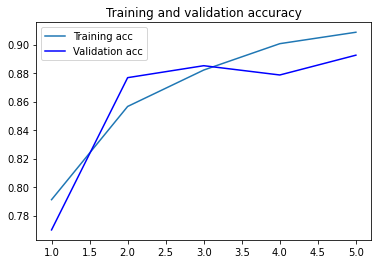

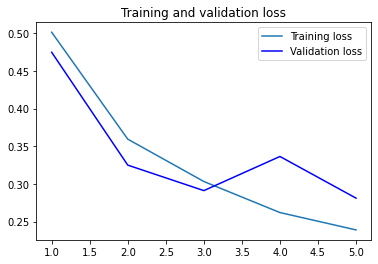

In [ ]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [ ]:
train_image_feature = np.load( '/content/drive/MyDrive/Fake_news_detection_weibo_covid19_-main/data/RumorDetection/train_image_feature.npy', allow_pickle=True)
#test_image_feature = np.load('../data/test_image_feature.npy', allow_pickle=True)

In [ ]:

train_content_sequence = keras.Input(
    shape=(100,)
)  # Variable-length sequence of ints
Embedding_layer = keras.layers.Embedding(
    max_words, embedding_dim, weights=[embedding_matrix], trainable=False
)(train_content_sequence)

In [ ]:
lstm_text=tf.keras.layers.LSTM(16)(Embedding_layer)
lstm_text= tf.keras.layers.Dense(8,activation='relu')(lstm_text)
lstm_test_pr=tf.keras.layers.Dense(3,activation="softmax")(lstm_text)
text_model= keras.Model(inputs=train_content_sequence, outputs=lstm_test_pr)

In [ ]:
### CNN Extraction of Image Features

In [ ]:
image_input = keras.Input(shape=(10, 10, 3))  
#image_feature = keras.layers.Dropout(0.2)(image_input)
image_feature = keras.layers.Conv2D(15, kernel_size = 2, padding="same",activation = 'relu')(image_input)
image_feature = keras.layers.Dropout(0.2)(image_feature)
image_feature = keras.layers.Conv2D(5, kernel_size = 2, activation = 'relu')(image_feature)
image_feature = keras.layers.Dropout(0.2)(image_feature)
image_feature = keras.layers.Conv2D(5, kernel_size = 2, activation = 'relu')(image_feature)
image_feature = keras.layers.Dropout(0.2)(image_feature)
#image_feature = keras.layers.MaxPooling2D(2)(image_feature)
image_feature = keras.layers.Flatten()(image_feature)

In [ ]:
x = keras.layers.Dense(8, activation="relu")(image_feature)
x = keras.layers.Dropout(0.2)(x)
#x = keras.layers.Dense(8, activation="relu")(x)
im_pred = keras.layers.Dense(3, activation="softmax", name="pred")(x)
img_model=keras.Model(inputs=image_input, outputs=im_pred)
img_model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 10, 10, 3)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 10, 10, 15)        195       
_________________________________________________________________
dropout_2 (Dropout)          (None, 10, 10, 15)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 9, 9, 5)           305       
_________________________________________________________________
dropout_3 (Dropout)          (None, 9, 9, 5)           0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 8, 8, 5)           105       
_________________________________________________________________
dropout_4 (Dropout)          (None, 8, 8, 5)           0   

### Text and image fusion multimodal

In [ ]:
# Combine wide and deep into one model
merged_out = keras.layers.concatenate([text_model.output, img_model.output])
merged_out=keras.layers.Dropout(0.2)(merged_out)
merged_out =keras.layers.Dense(3, activation='softmax')(merged_out)

combined_model = keras.Model([text_model.input,img_model.input], merged_out)
print(combined_model.summary())

combined_model.compile(optimizer=keras.optimizers.RMSprop(1e-3),
              loss=keras.losses.CategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 10, 10, 3)]  0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 10, 10, 15)   195         input_2[0][0]                    
__________________________________________________________________________________________________
dropout_2 (Dropout)             (None, 10, 10, 15)   0           conv2d[0][0]                     
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 9, 9, 5)      305         dropout_2[0][0]                  
____________________________________________________________________________________________

In [ ]:
import time
#time
early_stop = tf.keras.callbacks.EarlyStopping(monitor='accuracy', patience=10)
history =  combined_model.fit([data, train_image_feature],
                    labels, epochs=5, batch_size=32, validation_split=0.2,verbose=1,callbacks= [early_stop])

Epoch 1/5
1248/1248 [==============================] - 56s 45ms/step - loss: 0.7421 - accuracy: 0.6744 - val_loss: 0.5058 - val_accuracy: 0.8380
Epoch 2/5
1248/1248 [==============================] - 56s 45ms/step - loss: 0.5692 - accuracy: 0.7381 - val_loss: 0.4072 - val_accuracy: 0.8644
Epoch 3/5
1248/1248 [==============================] - 56s 45ms/step - loss: 0.5169 - accuracy: 0.7525 - val_loss: 0.3664 - val_accuracy: 0.8747
Epoch 4/5
1248/1248 [==============================] - 55s 44ms/step - loss: 0.4849 - accuracy: 0.7611 - val_loss: 0.3304 - val_accuracy: 0.8880
Epoch 5/5
1248/1248 [==============================] - 57s 46ms/step - loss: 0.4574 - accuracy: 0.7716 - val_loss: 0.3159 - val_accuracy: 0.8946


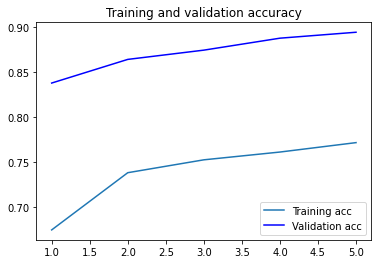

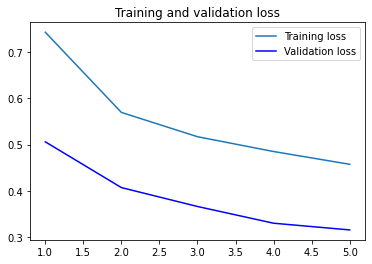

In [ ]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [ ]:
###  BiLSTM+ATTENTION Model

In [ ]:
from keras.layers import Bidirectional
lstm_text1=keras.layers.Bidirectional(keras.layers.LSTM(16))(Embedding_layer)
lstm_text1= keras.layers.Dense(8,activation='relu')(lstm_text1)
attention=keras.layers.Attention(use_scale=False)([lstm_text1,lstm_text1])
Input_layer=tf.keras.layers.Concatenate()([lstm_text1, attention])
lstm_test_pr=keras.layers.Dense(3,activation="softmax")(lstm_text1)
text_model1= keras.Model(inputs=train_content_sequence ,outputs=lstm_test_pr)
text_model1.summary()

Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 100)]             0         
_________________________________________________________________
embedding_1 (Embedding)      (None, 100, 300)          3000000   
_________________________________________________________________
bidirectional (Bidirectional (None, 32)                40576     
_________________________________________________________________
dense_6 (Dense)              (None, 8)                 264       
_________________________________________________________________
dense_7 (Dense)              (None, 3)                 27        
Total params: 3,040,867
Trainable params: 40,867
Non-trainable params: 3,000,000
_________________________________________________________________


In [ ]:
image_input = keras.Input(shape=(10, 10, 3))  
#image_feature = keras.layers.Dropout(0.2)(image_input)
image_feature = keras.layers.Conv2D(15, kernel_size = 2, padding="same",activation = 'relu')(image_input)
image_feature = keras.layers.Dropout(0.2)(image_feature)
image_feature = keras.layers.Conv2D(5, kernel_size = 2, activation = 'relu')(image_feature)
image_feature = keras.layers.Dropout(0.2)(image_feature)
image_feature = keras.layers.Conv2D(5, kernel_size = 2, activation = 'relu')(image_feature)
image_feature = keras.layers.Dropout(0.2)(image_feature)
image_feature = keras.layers.MaxPooling2D(2)(image_feature)
image_feature = keras.layers.Flatten()(image_feature)
x = keras.layers.Dense(8, activation="relu")(image_feature)
x = keras.layers.Dropout(0.2)(x)
#x = keras.layers.Dense(8, activation="relu")(x)
im_pred = keras.layers.Dense(3, activation="softmax", name="pred")(x)
img_model=keras.Model(inputs=image_input, outputs=im_pred)
img_model.summary()

Model: "model_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 10, 10, 3)]       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 10, 10, 15)        195       
_________________________________________________________________
dropout_7 (Dropout)          (None, 10, 10, 15)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 9, 9, 5)           305       
_________________________________________________________________
dropout_8 (Dropout)          (None, 9, 9, 5)           0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 8, 8, 5)           105       
_________________________________________________________________
dropout_9 (Dropout)          (None, 8, 8, 5)           0   

In [ ]:
# Combine wide and deep into one model
merged_out = keras.layers.concatenate([text_model1.output, img_model.output])
merged_out =keras.layers.Dense(3, activation='softmax')(merged_out)
combined_model = keras.Model([text_model1.input,img_model.input], merged_out)
print(combined_model.summary())

combined_model.compile(optimizer=keras.optimizers.RMSprop(1e-3),
              loss=keras.losses.CategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

Model: "model_5"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, 10, 10, 3)]  0                                            
__________________________________________________________________________________________________
conv2d_3 (Conv2D)               (None, 10, 10, 15)   195         input_3[0][0]                    
__________________________________________________________________________________________________
dropout_7 (Dropout)             (None, 10, 10, 15)   0           conv2d_3[0][0]                   
__________________________________________________________________________________________________
conv2d_4 (Conv2D)               (None, 9, 9, 5)      305         dropout_7[0][0]                  
____________________________________________________________________________________________

In [ ]:
%%time
early_stop = tf.keras.callbacks.EarlyStopping(monitor='accuracy', patience=10)
history =  combined_model.fit([data, train_image_feature],
                    labels, epochs=5, batch_size=32, validation_split=0.2,verbose=1,callbacks= [early_stop])

Epoch 1/5
1248/1248 [==============================] - 95s 74ms/step - loss: 0.7837 - accuracy: 0.6849 - val_loss: 0.5189 - val_accuracy: 0.8331
Epoch 2/5
1248/1248 [==============================] - 93s 74ms/step - loss: 0.4157 - accuracy: 0.8569 - val_loss: 0.3453 - val_accuracy: 0.8776
Epoch 3/5
1248/1248 [==============================] - 93s 74ms/step - loss: 0.3088 - accuracy: 0.8917 - val_loss: 0.3190 - val_accuracy: 0.8843
Epoch 4/5
1248/1248 [==============================] - 93s 75ms/step - loss: 0.2560 - accuracy: 0.9087 - val_loss: 0.2830 - val_accuracy: 0.8986
Epoch 5/5
1248/1248 [==============================] - 94s 75ms/step - loss: 0.2230 - accuracy: 0.9222 - val_loss: 0.2765 - val_accuracy: 0.9006
CPU times: user 13min 39s, sys: 15.4 s, total: 13min 55s
Wall time: 7min 47s


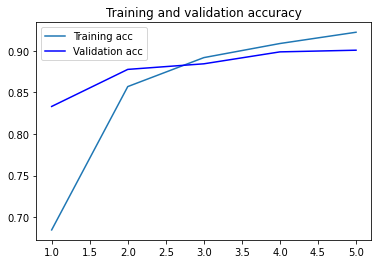

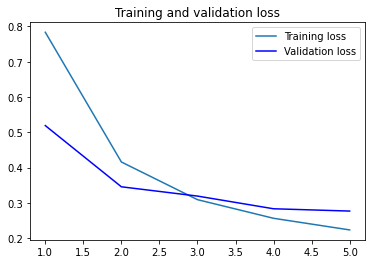

In [ ]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()